In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import goat_plots as gp
import goat_io as io
import goat_tools as gt
import goat_means as gm
import goat_graphs as gg

 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 


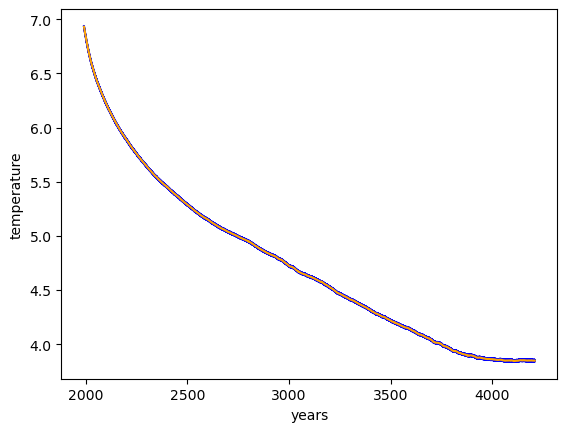

In [13]:
gg.timeseries('lfr0', 1990, 2400, 'thetao', '3D', 1, 'norm', 'ave', 0, 'blue')
gg.timeseries('lfr1', 1990, 2391, 'thetao', '3D', 1, 'norm', 'ave', 410, 'blue')
gg.timeseries('lfr2', 1990, 2350, 'thetao', '3D', 1, 'norm', 'ave', 811, 'blue')
gg.timeseries('lfr3', 1990, 2350, 'thetao', '3D', 1, 'norm', 'ave', 1171, 'blue')
gg.timeseries('lfr4', 1990, 2350, 'thetao', '3D', 1, 'norm', 'ave', 1531, 'blue')
gg.timeseries('lfr5', 1990, 2320, 'thetao', '3D', 1, 'norm', 'ave', 1891, 'blue')
#
gg.timeseries('lfr0', 1990, 2400, 'thetao', '3D', 1, 'norm', 'mave', 0, 'orange')
gg.timeseries('lfr1', 1990, 2391, 'thetao', '3D', 1, 'norm', 'mave', 410, 'orange')
gg.timeseries('lfr2', 1990, 2350, 'thetao', '3D', 1, 'norm', 'mave', 811, 'orange')
gg.timeseries('lfr3', 1990, 2350, 'thetao', '3D', 1, 'norm', 'mave', 1171, 'orange')
gg.timeseries('lfr4', 1990, 2350, 'thetao', '3D', 1, 'norm', 'mave', 1531, 'orange')
gg.timeseries('lfr5', 1990, 2320, 'thetao', '3D', 1, 'norm', 'mave', 1891, 'orange')

 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 


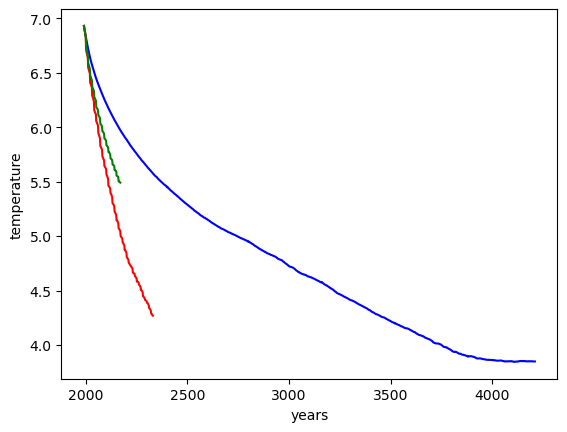

In [4]:
gg.timeseries('lfr0', 1990, 2400, 'thetao', '3D', 1, 'norm', 'mave', 0, 'b')
gg.timeseries('lfr1', 1990, 2391, 'thetao', '3D', 1, 'norm', 'mave', 410, 'b')
gg.timeseries('lfr2', 1990, 2350, 'thetao', '3D', 1, 'norm', 'mave', 811, 'b')
gg.timeseries('lfr3', 1990, 2350, 'thetao', '3D', 1, 'norm', 'mave', 1171, 'b')
gg.timeseries('lfr4', 1990, 2350, 'thetao', '3D', 1, 'norm', 'mave', 1531, 'b')
gg.timeseries('lfr5', 1990, 2320, 'thetao', '3D', 1, 'norm', 'mave', 1891, 'b')
gg.timeseries('lf01', 1990, 2330, 'thetao', '3D', 1, 'norm', 'mave', 0, 'r')
gg.timeseries('lf02', 1990, 2170, 'thetao', '3D', 1, 'norm', 'mave', 0, 'g')

 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 


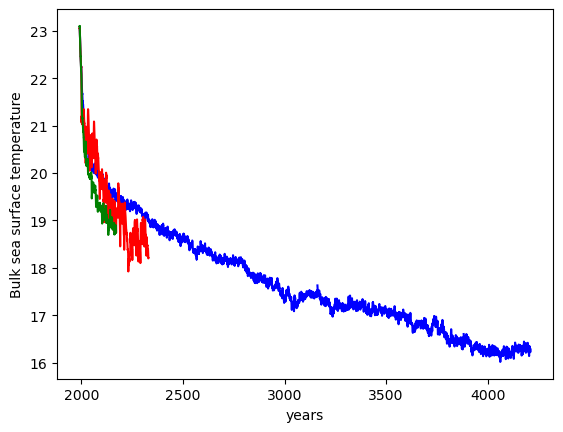

In [8]:
var='tos'
gg.timeseries('lfr0', 1990, 2400, var, '2D', 1, 'norm', 'mave', 0, 'b')
gg.timeseries('lfr1', 1990, 2391, var, '2D', 1, 'norm', 'mave', 410, 'b')
gg.timeseries('lfr2', 1990, 2350, var, '2D', 1, 'norm', 'mave', 811, 'b')
gg.timeseries('lfr3', 1990, 2350, var, '2D', 1, 'norm', 'mave', 1171, 'b')
gg.timeseries('lfr4', 1990, 2350, var, '2D', 1, 'norm', 'mave', 1531, 'b')
gg.timeseries('lfr5', 1990, 2320, var, '2D', 1, 'norm', 'mave', 1891, 'b')
gg.timeseries('lf01', 1990, 2330, var, '2D', 1, 'norm', 'mave', 0, 'r')
gg.timeseries('lf02', 1990, 2170, var, '2D', 1, 'norm', 'mave', 0, 'g')

 Averaged data found 
 Averaged data found 
 Averaged data found 
 Averaged data found 


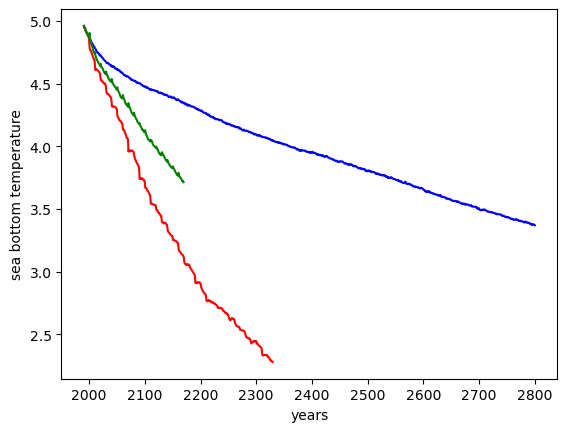

In [6]:
var='sbt'
gg.timeseries('lfr0', 1990, 2400, var, '2D', 1, 'norm', 'mave', 0, 'b')
gg.timeseries('lfr1', 1990, 2391, var, '2D', 1, 'norm', 'mave', 410, 'b')
gg.timeseries('lf01', 1990, 2330, var, '2D', 1, 'norm', 'mave', 0, 'r')
gg.timeseries('lf02', 1990, 2170, var, '2D', 1, 'norm', 'mave', 0, 'g')

 Averaged data found 


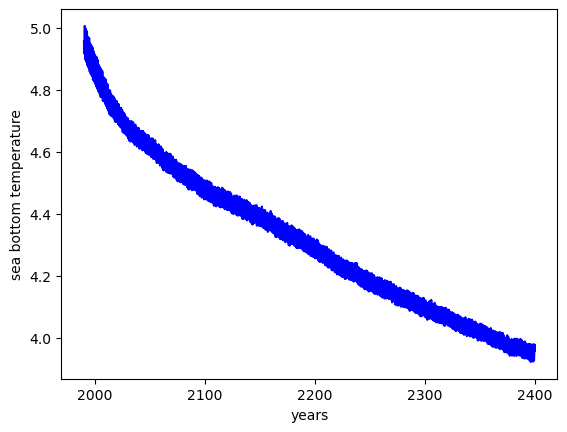

In [3]:
gg.timeseries('lfr0', 1990, 2400, 'sbt', '2D', 1, 'norm', 'ave', 0, 'b')

 Averaged data not found. Creating new file ... 
 Loading data ... 
 Averaging ... 
 Saving averaged data ... 


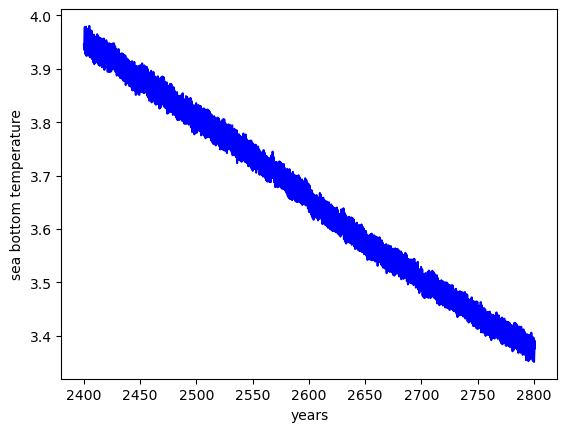

In [5]:
gg.timeseries('lfr1', 1990, 2391, 'sbt', '2D', 1, 'norm', 'ave', 410, 'b')

In [ ]:
gg.timeseries('lfr2', 1990, 2350, 'sbt', '2D', 1, 'norm', 'mave', 811, 'b')